In [18]:
import pandas as pd
import random 
dane = pd.read_csv('/Users/daria/Desktop/PROJEKT/dane.csv', sep = ';')
dane.head()
dane.columns

Index(['nr os', 'nr oj', 'nr ma', 'rok', 'ferma', 'liur', 'liod', 'c1(BS)',
       'c2(CT)', 'c3(CP)', 'c4(CD)', 'c5(HL)', 'c6(PS)', 'c7(GA)', 'LOP'],
      dtype='object')

In [19]:
test = dane.groupby(['ferma','rok']).mean()
srednie = dane.groupby(['ferma']).mean()
srednie

,nr os,nr oj,nr ma,rok,liur,liod,c1(BS),c2(CT),c3(CP),c4(CD),c5(HL),c6(PS),c7(GA),LOP
ferma,,,,,,,,,,,,,,
1,5220.550847,3058.135593,3809.313559,89.754237,4.084746,3.601695,5.644068,2.915254,2.406780,2.957627,5.415254,5.711864,2.652542,27.703390
2,5314.269444,3024.087963,3295.375926,89.592593,5.206481,4.176852,4.050000,2.317593,2.801852,2.835185,5.377778,4.917593,2.973148,25.273148
3,4752.159841,2862.451081,2272.474403,89.483504,5.472696,5.079636,4.559158,2.696246,2.905575,2.818544,5.674061,5.794084,2.492036,26.933447


In [20]:
wsp_reg = pd.read_csv('/Users/daria/Desktop/PROJEKT/W_hodowlana_selekcja/h^2_do_w_hod.csv', sep = ';')

In [21]:
wsp_reg

,Cecha,wariancja_genetyczna,wariancja_błedu,wariancja_fenotypowa,h^2,h^2_dobre
0,wielkość osobnika,"0,54","0,52","1,06","0,51",0.51
1,kolor okrywy włosowej,"0,06","0,24","0,3","0,20",0.20
2,czystość koloru okrywy włosowej,"0,02","0,16","0,18","0,11",0.11
3,gęstość okrywy włosowej,"0,03","0,16","0,19","0,16",0.16
4,długość włosów,"0,05","0,21","0,26","0,19",0.19
5,czystość posrebrzenia okrywy włosowej,"0,1","0,28","0,38","0,26",0.26
6,wygląd ogólny,"0,05","0,2","0,25","0,20",0.20
7,łaczna ocena pokroju,"1,82","0,74","2,56","0,71",0.71


# $$ \stackrel\frown{G} = b_{yp} (P_i - \bar{P}) + \bar{P} $$

# Wielkość osobnika

In [414]:
#test = test['c1(BS)'].unstack(level='ferma')

In [415]:
test
test.iloc[1].iloc[1]

1824.0975609756097

In [23]:
wlk = dane[['rok','ferma','nr os','nr oj','nr ma','c7(GA)']]
wlk['byp'] = wsp_reg['h^2_dobre'][6]
wlk['mean'] = 0

/var/folders/n2/w02nhlvs4x56ssy2xm7332lw0000gn/T/ipykernel_40968/607355949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wlk['byp'] = wsp_reg['h^2_dobre'][6]
/var/folders/n2/w02nhlvs4x56ssy2xm7332lw0000gn/T/ipykernel_40968/607355949.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wlk['mean'] = 0


In [24]:
wlk['mean'] = wlk.apply(lambda row: srednie['c7(GA)'].iloc[0] 
                        if row['ferma'] == 1 else (srednie['c7(GA)'].iloc[1] 
                        if row['ferma'] == 2 else (srednie['c7(GA)'].iloc[2] 
                        if row['ferma'] == 3 else '0')), axis = 1)

/var/folders/n2/w02nhlvs4x56ssy2xm7332lw0000gn/T/ipykernel_40968/2593204729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wlk['mean'] = wlk.apply(lambda row: srednie['c7(GA)'].iloc[0]


In [8]:
wlk

,rok,ferma,nr os,nr oj,nr ma,c7(GA),byp,mean
0,88,1,3788,1285,1287,3,0.2,2.652542
1,88,1,3789,2211,1303,3,0.2,2.652542
2,88,1,3790,1285,1287,3,0.2,2.652542
3,88,1,3791,2211,1303,3,0.2,2.652542
4,88,1,3793,2211,1303,3,0.2,2.652542
...,...,...,...,...,...,...,...,...
2951,93,3,6660,4409,2677,3,0.2,2.492036
2952,93,3,6661,4701,6341,3,0.2,2.492036
2953,93,3,6662,4701,6341,3,0.2,2.492036
2954,93,3,6663,6368,6369,3,0.2,2.492036


In [9]:
wlk['mean'].value_counts()

2.492036    1758
2.973148    1080
2.652542     118
Name: mean, dtype: int64

In [25]:
wlk = wlk.assign(G=lambda x: (x['byp'] *(x['c7(GA)'] - x['mean']) + x['mean']))

In [11]:
wlk['G'].value_counts(sort = True)

2.978519    1054
2.593629     881
2.393629     833
2.722034      81
2.193629      39
2.522034      33
2.778519      23
2.322034       4
2.578519       3
3.193629       2
2.993629       1
3.393629       1
3.793629       1
Name: G, dtype: int64

# Selekcja

$$ ∆A = (A_1 - A_0)$$
$$ A_1 = {A_o + A_m \over 2}$$

________________

In [422]:
wlk['G_ma'] = 0
wlk['G_oj'] = 0

In [423]:
for index, row in wlk.iterrows():
    nr_ojciec = wlk['nr oj'][index]
    g_oj = wlk['G'][index]
    for index2, row2 in wlk.iterrows():
        if nr_ojciec == wlk['nr os'][index2]:
            wlk['G_oj'][index2] = g_oj
            break
        else:
            continue
            
for index, row in wlk.iterrows():
    nr_matka = wlk['nr ma'][index]
    g_ma = wlk['G'][index]
    for index2, row2 in wlk.iterrows():
        if nr_matka == wlk['nr os'][index2]:
            wlk['G_ma'][index2] = g_ma
            break
        else:
            continue

/var/folders/n2/w02nhlvs4x56ssy2xm7332lw0000gn/T/ipykernel_38139/174873766.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wlk['G_oj'][index2] = g_oj
/var/folders/n2/w02nhlvs4x56ssy2xm7332lw0000gn/T/ipykernel_38139/174873766.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wlk['G_ma'][index2] = g_ma


In [431]:
selekcja = wlk

In [12]:
wlk['G_oj'].value_counts()

KeyError: 'G_oj'

In [ ]:
wlk['G_oj'].value_counts()
wlk['G_ma'].value_counts()

In [434]:
wlk['nr oj'].value_counts().head(20)

3322    45
116     43
93      39
2927    37
849     33
3774    31
722     30
2130    30
2379    30
3431    30
2152    29
363     28
1830    28
185     27
2502    26
796     26
517     26
2989    26
3779    25
672     24
Name: nr oj, dtype: int64

In [435]:
wlk[wlk['nr os'] == 722]

,rok,ferma,nr os,nr oj,nr ma,c1(BS),byp,mean,G,G_ma,G_oj


In [446]:
selekcja  = wlk
selekcja

,rok,ferma,nr os,nr oj,nr ma,c1(BS),byp,mean,G,G_ma,G_oj
0,88,1,3788,1285,1287,6,0.51,5.644068,5.825593,0.000000,0.000000
1,88,1,3789,2211,1303,6,0.51,5.644068,5.825593,0.000000,0.000000
2,88,1,3790,1285,1287,6,0.51,5.644068,5.825593,0.000000,5.825593
3,88,1,3791,2211,1303,4,0.51,5.644068,4.805593,5.825593,0.000000
4,88,1,3793,2211,1303,4,0.51,5.644068,4.805593,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2951,93,3,6660,4409,2677,6,0.51,4.559158,5.293987,0.000000,0.000000
2952,93,3,6661,4701,6341,6,0.51,4.559158,5.293987,0.000000,0.000000
2953,93,3,6662,4701,6341,6,0.51,4.559158,5.293987,0.000000,0.000000
2954,93,3,6663,6368,6369,6,0.51,4.559158,5.293987,0.000000,0.000000


In [449]:
selekcja = selekcja.drop(selekcja[(selekcja.G_oj == 0)].index)
selekcja = selekcja.drop(selekcja[(selekcja.G_ma == 0)].index)

In [450]:
selekcja

,rok,ferma,nr os,nr oj,nr ma,c1(BS),byp,mean,G,G_ma,G_oj


_________

# Różnica selekcyjna dla wielkości

In [26]:
diff = wlk[['rok','ferma','G']]

In [27]:
diff = diff.groupby(['ferma','rok']).mean()
diff

G
ferma rok          
1     88   2.693462
      89   2.556180
      90   2.722034
      91   2.702034
      92   2.722034
2     88   2.966019
      89   2.974181
      90   2.973831
      91   2.978519
      92   2.972136
3     88   2.494534
      89   2.484091
      90   2.469410
      91   2.492823
      92   2.560296
      93   2.534370

# Wykresy dla wielkości

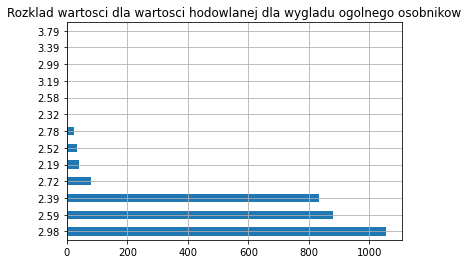

In [28]:
import matplotlib.pyplot as plt
wlk['G'].round(2).value_counts().round(2).plot(kind='barh')
plt.title("Rozklad wartosci dla wartosci hodowlanej dla wygladu ogolnego osobnikow")
plt.grid()

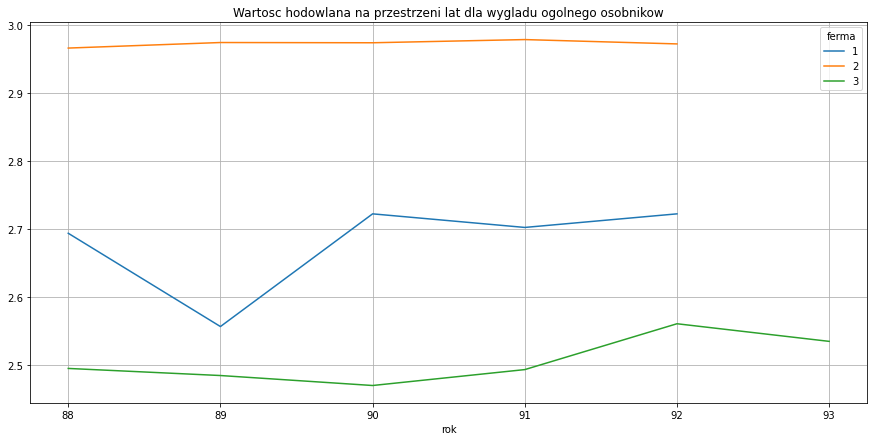

In [28]:
import matplotlib.pyplot as plt
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
wlk.groupby(['rok','ferma']).mean()['G'].unstack().plot(ax=ax)
plt.title("Wartosc hodowlana na przestrzeni lat dla wygladu ogolnego osobnikow")
plt.grid()

#